## A simple EDA on cars dataset

- **LinkedIn** - https://www.linkedin.com/in/-mohamad-ehthesham/overlay/contact-info/

- **GitHub** - https://github.com/MohamadFaiz0102

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [116]:
cars=pd.read_csv('Cars Data.csv')

In [117]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


- **MSRP**- Manufacturers suggested retail price
- **Invoice**- An invoice is a request for payment, An invoice is issued before payment as a way of requesting compensation 
for goods or services
- **MPG_city** - miles per gallon in city
- **MPG_highway** - miles per gallon in highway

In [118]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [119]:
cars.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [121]:
cars.shape

(428, 15)

In [122]:
cars['EngineSize'].mean()

3.1967289719626195

In [8]:
# fill the null values with mean of that column
cars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [9]:
# removing 2 blanks rows in cylinders column
cars.dropna(inplace=True)

In [10]:
cars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [11]:
cars.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172


### Split the column data

In [12]:
new_col=cars['MSRP'].str.split('$',expand=True)

new_col[1]

0      36,945
1      23,820
2      26,990
3      33,195
4      43,755
        ...  
423    40,565
424    42,565
425    45,210
426    26,135
427    35,145
Name: 1, Length: 426, dtype: object

### Concat column

In [13]:
# add the new col to data and then remove comma
cars=pd.concat([cars,new_col[1]],axis=1)

### Rename the column

In [14]:
cars.rename(columns={1:'New_MSRP'},inplace=True)
cars

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,New_MSRP
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189,"36,945"
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172,"23,820"
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183,"26,990"
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186,"33,195"
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197,"43,755"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186,"40,565"
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186,"42,565"
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190,"45,210"
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180,"26,135"


#### Replace , in MSRP

In [15]:
cars['New_MSRP']=cars['New_MSRP'].str.replace(',','')
cars.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,New_MSRP
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189,36945
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172,23820


### Delete columns

In [16]:
# so delete unnesessary columns
# MSRP, 'MOdel',Cylinders, MPG_City, MPG_Highway

### which model has highest average MPG_city and MPG_highway

In [17]:
mpg_city=cars.groupby('Model')['MPG_City'].mean().sort_values(ascending=False).head(5)
mpg_city

Model
Insight 2dr (gas/electric)                60.0
Prius 4dr (gas/electric)                  59.0
Civic Hybrid 4dr manual (gas/electric)    46.0
Jetta GLS TDI 4dr                         38.0
Civic HX 2dr                              36.0
Name: MPG_City, dtype: float64

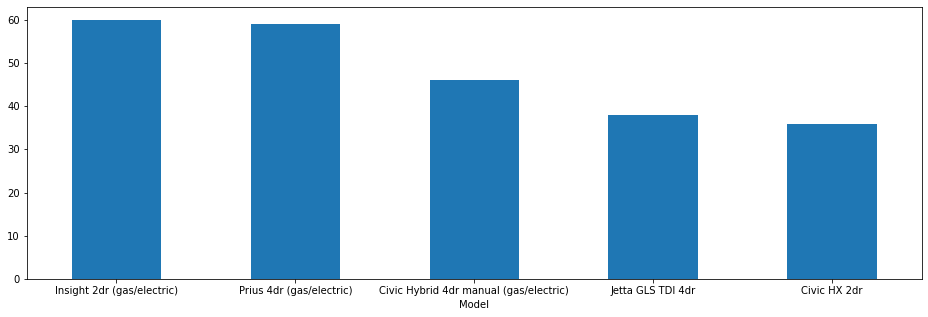

In [89]:
mpg_city.plot(kind='bar',figsize=(13,7))

plt.tight_layout()
plt.xticks(rotation=360);

In [19]:
mpg_highway=cars.groupby('Model')['MPG_Highway'].mean().sort_values(ascending=False).head(5)

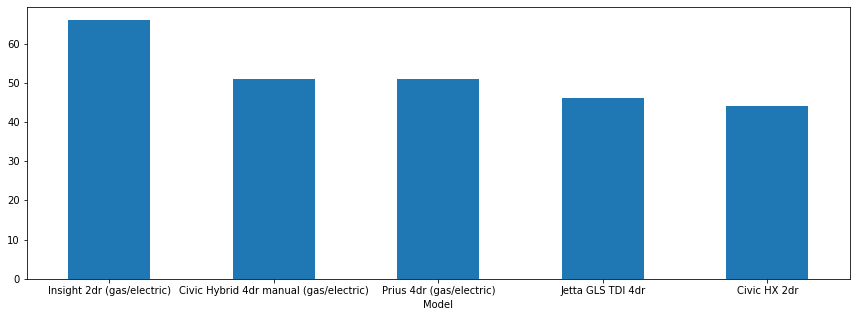

In [92]:
mpg_highway.plot(kind='bar',figsize=(12,7))

plt.tight_layout()
plt.xticks(rotation=360);

### which type has highest average MPG_city and MPG_highway

In [21]:
t1=cars.groupby('Type')[['MPG_City']].mean().sort_values(by=['MPG_City'],ascending=False).head(5)

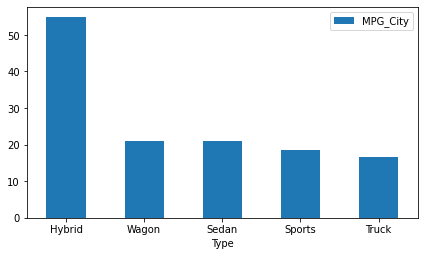

In [80]:
t1.plot(kind='bar')

plt.tight_layout()
plt.xticks(rotation=360);

In [23]:
t2=cars.groupby('Type')[['MPG_Highway']].mean().sort_values(by=['MPG_Highway'],ascending=False).head(5)

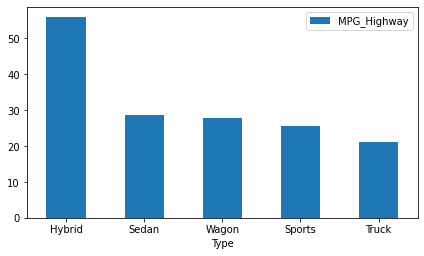

In [79]:
t2.plot(kind='bar')

plt.tight_layout()
plt.xticks(rotation=360);

###    ###################### ***********

In [25]:
cars.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,New_MSRP
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189,36945
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172,23820


In [26]:
# weight

cars[cars['Weight']>6000]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,New_MSRP
118,Ford,Excursion 6.8 XLT,SUV,USA,All,"$41,475","$36,494",6.8,10.0,310,10,13,7190,137,227,41475
143,GMC,Yukon XL 2500 SLT,SUV,USA,All,"$46,265","$40,534",6.0,8.0,325,13,17,6133,130,219,46265
166,Hummer,H2,SUV,USA,All,"$49,995","$45,815",6.0,8.0,316,10,12,6400,123,190,49995


### Finding if car weight effects MPG

In [27]:
#p1=cars[['Type','Weight','MPG_City']].sort_values(by=['Weight'],ascending=False).head(10)

p1= cars.groupby('Weight')[['MPG_City']].mean().sort_values(by=['Weight','MPG_City'],ascending=False).head(10)
p1

,MPG_City
Weight,
7190,10.0
6400,10.0
6133,13.0
5969,13.0
5879,13.0
5678,14.0
5590,13.0
5464,14.0
5440,13.0


In [28]:
p2= cars.groupby('Weight')[['MPG_Highway']].mean().sort_values(by=['Weight','MPG_Highway'],ascending=False).head(10)
p2

,MPG_Highway
Weight,
7190,13.0
6400,12.0
6133,17.0
5969,18.0
5879,17.0
5678,18.0
5590,17.0
5464,18.0
5440,18.0


### find corolletion between mpg and weight

In [29]:
cars['Weight'].corr(cars['MPG_City'])

-0.7404179864964197

<AxesSubplot:xlabel='MPG_City', ylabel='Weight'>

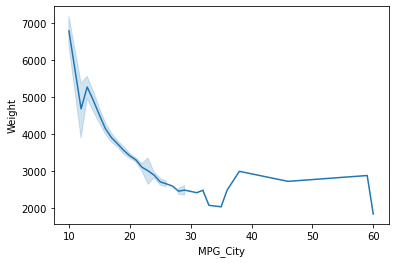

In [30]:
sns.lineplot(x='MPG_City',y='Weight',data=cars)

In [31]:
cars.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,New_MSRP
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189,36945
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172,23820


In [32]:
d1=cars['Make'].value_counts().head(10)
d1

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Volkswagen       15
Chrysler         15
Name: Make, dtype: int64

<AxesSubplot:ylabel='Make'>

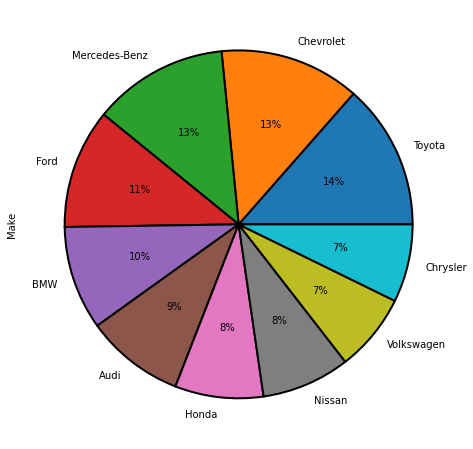

In [103]:
d1.plot(kind='pie',figsize=(8,8),wedgeprops={"edgecolor":"k",'linewidth': 2},autopct='%1.0f%%')


In [34]:
cars.head(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,New_MSRP
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189,36945


### Show all records of Asia and Europe

In [37]:
cars[cars['Origin'].isin(['Asia','Europe'])].count()

Make           279
Model          279
Type           279
Origin         279
DriveTrain     279
MSRP           279
Invoice        279
EngineSize     279
Cylinders      279
Horsepower     279
MPG_City       279
MPG_Highway    279
Weight         279
Wheelbase      279
Length         279
New_MSRP       279
dtype: int64

In [40]:
cars[cars['Origin'].isin(['Asia','Europe'])].nunique()

Make            24
Model          276
Type             6
Origin           2
DriveTrain       3
MSRP           271
Invoice        276
EngineSize      33
Cylinders        6
Horsepower      92
MPG_City        26
MPG_Highway     31
Weight         233
Wheelbase       34
Length          53
New_MSRP       271
dtype: int64

### Change column type

In [61]:
cars['New_MSRP']=pd.to_numeric(cars['New_MSRP'])

In [62]:
cars.New_MSRP.dtype

dtype('int64')

### Find which type has highest MSRP

In [77]:
cars.groupby(['Type'])[['New_MSRP']].sum().sort_values(by='New_MSRP',ascending=False)


,New_MSRP
Type,
Sedan,7800688
Sports,2563066
SUV,2087415
Wagon,865216
Truck,598593
Hybrid,59760


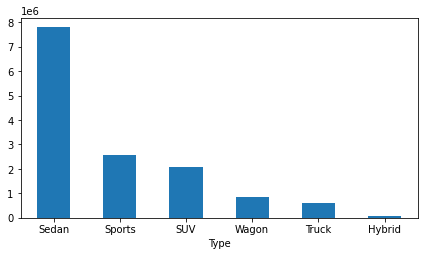

In [78]:
cars.groupby(['Type'])['New_MSRP'].sum().sort_values(ascending=False).plot(kind='bar')


plt.tight_layout()
plt.xticks(rotation=360);

###                                                                                Thank You